In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.featureScheduler.utils import hp_in_lsst_fov
import healpy as hp

In [2]:
nside = 32
result = np.zeros(hp.nside2npix(nside), dtype=float)

In [3]:
hp_in = hp_in_lsst_fov(nside=nside)

In [4]:
#fit_result = np.load('thomson_6000_ni1000.npz')
fit_result = np.load('thomson_5192_ni1000.npz')


In [5]:
fit_result['result'].shape

(3, 5192)

In [6]:
def xyz2thetaphi(x, y, z):
    phi = np.arccos(z)
    theta = np.arctan2(y, x)
    return theta, phi

In [7]:
theta, phi = xyz2thetaphi(fit_result['result'][0,:], fit_result['result'][1,:], fit_result['result'][2,:])
ra = theta+np.pi
dec = np.pi/2 - phi

In [8]:
np.degrees(dec.max()), np.degrees(ra.max())

(88.75124448848706, 359.940873328365)

In [9]:
for ra_t, dec_t in zip(ra, dec):
    indx = hp_in(ra_t, dec_t)
    result[indx] +=1

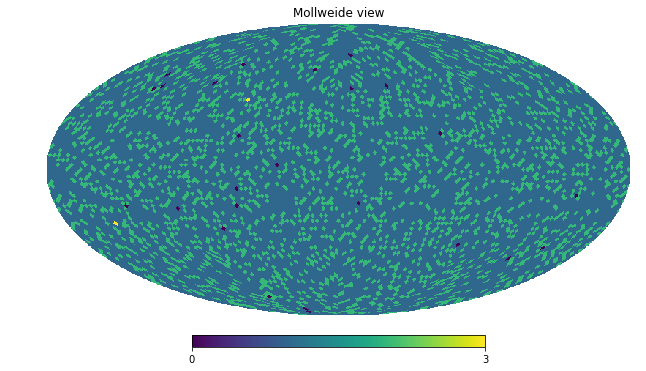

In [10]:
hp.mollview(result)

In [11]:
np.where(result == 0)[0].size

25

In [12]:
np.mean(result)

1.2115071614583333